Anomaly detection using RNN algorithm

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.models import Model

# Generate some dummy data
# Replace this with your actual dataset
data = np.random.randn(1000, 1)

# Normalize the data
data_mean = data.mean(axis=0)
data_std = data.std(axis=0)
data = (data - data_mean) / data_std

# Prepare sequential data
sequence_length = 10
sequences = []
for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length+1])

sequences = np.array(sequences)

# Split data into inputs and outputs
X = sequences[:, :-1]
y = sequences[:, -1]

# Split data into training and testing sets
split = int(0.8 * len(sequences))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define RNN model
inputs = Input(shape=(X.shape[1], X.shape[2]))
lstm1 = LSTM(50, return_sequences=True)(inputs)
lstm2 = LSTM(50)(lstm1)
dense = Dense(1)(lstm2)
model = Model(inputs=inputs, outputs=dense)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict on test data
y_pred = model.predict(X_test)

# Calculate reconstruction error
mse = np.mean(np.square(y_test - y_pred))

# Set a threshold for anomaly detection
threshold = 0.1

# Detect anomalies
anomalies = np.where(mse > threshold)[0]
print("Anomalies detected at indexes:", anomalies)


Epoch 1/50
25/25 [==============================] - 10s 80ms/step - loss: 1.0003 - val_loss: 1.0206
Epoch 2/50
25/25 [==============================] - 0s 20ms/step - loss: 0.9979 - val_loss: 1.0161
Epoch 3/50
25/25 [==============================] - 0s 20ms/step - loss: 0.9965 - val_loss: 1.0169
Epoch 4/50
25/25 [==============================] - 1s 20ms/step - loss: 0.9951 - val_loss: 1.0155
Epoch 5/50
25/25 [==============================] - 1s 20ms/step - loss: 0.9965 - val_loss: 1.0139
Epoch 6/50
25/25 [==============================] - 1s 22ms/step - loss: 0.9967 - val_loss: 1.0193
Epoch 7/50
25/25 [==============================] - 1s 21ms/step - loss: 0.9953 - val_loss: 1.0132
Epoch 8/50
25/25 [==============================] - 1s 23ms/step - loss: 0.9948 - val_loss: 1.0114
Epoch 9/50
25/25 [==============================] - 1s 25ms/step - loss: 0.9938 - val_loss: 1.0135
Epoch 10/50
25/25 [==============================] - 1s 22ms/step - loss: 0.9969 - val_loss: 1.0179
Epoch 11

<ipython-input-1-d4c0ac4b1d5c>:55: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  anomalies = np.where(mse > threshold)[0]


nomaly detection with minimum covariance determinant

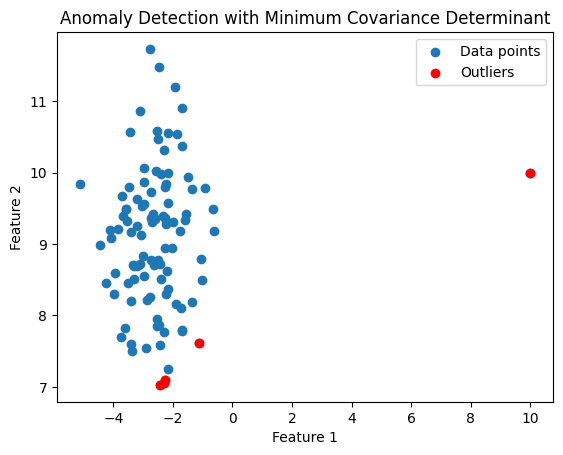

In [ ]:
import numpy as np
from sklearn.covariance import MinCovDet
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic dataset with outliers
X, _ = make_blobs(n_samples=100, centers=1, cluster_std=1, random_state=42)
outliers = np.array([[10, 10]])
X = np.vstack([X, outliers])

# Fit the Minimum Covariance Determinant (MCD) estimator
mcd = MinCovDet()
mcd.fit(X)

# Calculate Mahalanobis distances to identify outliers
mahal_distances = mcd.mahalanobis(X - mcd.location_)
threshold = np.percentile(mahal_distances, 95)  # Adjust threshold as needed

# Identify outliers
outlier_indices = np.where(mahal_distances > threshold)[0]

# Plot the dataset and outliers
plt.scatter(X[:, 0], X[:, 1], label='Data points')
plt.scatter(X[outlier_indices, 0], X[outlier_indices, 1], color='r', label='Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection with Minimum Covariance Determinant')
plt.legend()
plt.show()

Isolation Forest

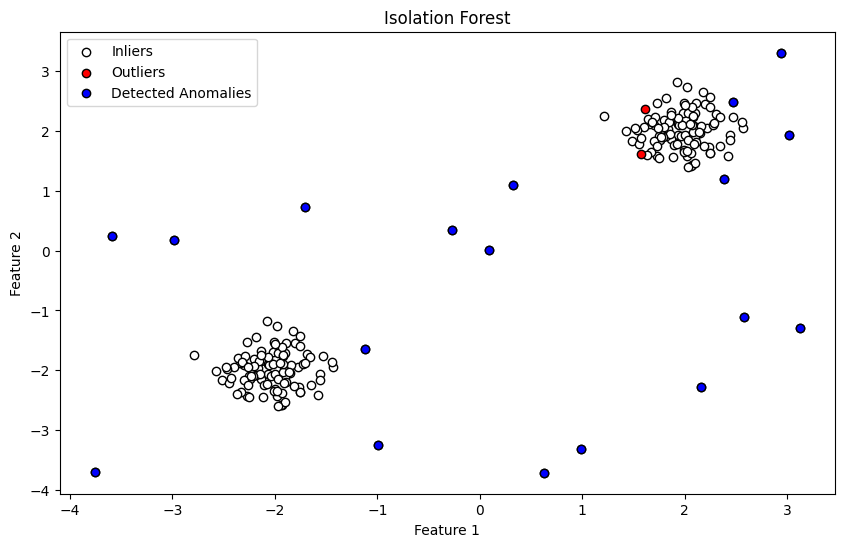

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate random data
np.random.seed(42)
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]  # Inliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))  # Outliers

# Fit the model
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X_train)

# Predict outliers
y_pred_train = clf.predict(X_train)
y_pred_outliers = clf.predict(X_outliers)

# Plot
plt.figure(figsize=(10, 6))

# Inliers
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolors='k', label='Inliers')

# Outliers
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', edgecolors='k', label='Outliers')

# Anomalies detected
plt.scatter(X_outliers[y_pred_outliers == -1][:, 0], X_outliers[y_pred_outliers == -1][:, 1], c='blue', edgecolors='k',
            label='Detected Anomalies')

plt.title('Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()